In [1]:
d = 40

In [2]:
import pandas as pd
import numpy as np
import scipy

In [3]:
url='https://www.arcgis.com/sharing/rest/content/items/66876b81065340a4a48710b062319336/data'
data_complete = pd.read_csv(url)
data_complete.head()

,IdBundesland,Bundesland,IdLandkreis,Landkreis,Altersgruppe,Altersgruppe2,Geschlecht,Meldedatum,Refdatum,IstErkrankungsbeginn,NeuerFall,NeuerTodesfall,NeuGenesen,AnzahlFall,AnzahlTodesfall,AnzahlGenesen,Datenstand
0,1,Schleswig-Holstein,1001,SK Flensburg,A15-A34,Nicht übermittelt,M,2020-10-28,2020-01-19,1,0,-9,0,1,0,1,"29.04.2022, 00:00 Uhr"
1,1,Schleswig-Holstein,1001,SK Flensburg,A15-A34,Nicht übermittelt,M,2020-03-19,2020-03-13,1,0,-9,0,1,0,1,"29.04.2022, 00:00 Uhr"
2,1,Schleswig-Holstein,1001,SK Flensburg,A15-A34,Nicht übermittelt,M,2020-03-21,2020-03-13,1,0,-9,0,1,0,1,"29.04.2022, 00:00 Uhr"
3,1,Schleswig-Holstein,1001,SK Flensburg,A35-A59,Nicht übermittelt,M,2020-03-14,2020-03-16,1,0,-9,0,1,0,1,"29.04.2022, 00:00 Uhr"
4,1,Schleswig-Holstein,1001,SK Flensburg,A15-A34,Nicht übermittelt,M,2020-03-19,2020-03-16,1,0,-9,0,1,0,1,"29.04.2022, 00:00 Uhr"


In [4]:
data = data_complete[['Bundesland', 'IdLandkreis', 'Landkreis', 'Refdatum', 'AnzahlFall']]
#data = data.query('Bundesland == "Bayern"')
data.head()

,Bundesland,IdLandkreis,Landkreis,Refdatum,AnzahlFall
0,Schleswig-Holstein,1001,SK Flensburg,2020-01-19,1
1,Schleswig-Holstein,1001,SK Flensburg,2020-03-13,1
2,Schleswig-Holstein,1001,SK Flensburg,2020-03-13,1
3,Schleswig-Holstein,1001,SK Flensburg,2020-03-16,1
4,Schleswig-Holstein,1001,SK Flensburg,2020-03-16,1


In [5]:
data.shape

(4838127, 5)

In [6]:
#aggregation_functions = {'Bundesland': 'first', 'IdLandkreis': 'first', 'Landkreis': 'first', 'Refdatum': 'first', 'AnzahlFall': 'sum'}
aggregation_functions = {'Bundesland': 'first', 'IdLandkreis': 'first', 'Landkreis': 'first', 'Refdatum': 'first', 'AnzahlFall': 'sum'}
data1 = data.groupby(['Landkreis', 'Refdatum']).aggregate(aggregation_functions)
#refer https://stackoverflow.com/questions/46826773/how-can-i-merge-rows-by-same-value-in-a-column-in-pandas-with-aggregation-func for combining numbers of rows with same values in other columns 
print(data1.shape)
data1.head()


(278998, 5)


Bundesland  IdLandkreis     Landkreis  \
Landkreis    Refdatum                                                 
LK Ahrweiler 2020-03-01  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-08  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-09  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-10  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-11  Rheinland-Pfalz         7131  LK Ahrweiler   

                           Refdatum  AnzahlFall  
Landkreis    Refdatum                            
LK Ahrweiler 2020-03-01  2020-03-01           1  
             2020-03-08  2020-03-08           2  
             2020-03-09  2020-03-09           1  
             2020-03-10  2020-03-10           1  
             2020-03-11  2020-03-11           1

In [7]:
#districts = data1['Landkreis'].unique()
#districts.shape
data1[0:10]

Bundesland  IdLandkreis     Landkreis  \
Landkreis    Refdatum                                                 
LK Ahrweiler 2020-03-01  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-08  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-09  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-10  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-11  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-12  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-13  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-14  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-15  Rheinland-Pfalz         7131  LK Ahrweiler   
             2020-03-16  Rheinland-Pfalz         7131  LK Ahrweiler   

                           Refdatum  AnzahlFall  
Landkreis    Refdatum                            
LK Ahrweiler 2020-03-01  2020-03-01           1  
             2020-03-08  2020-03-08           2  
             2020-03-09  2020-03-09           1  
             2020-03-10  2020-03-10           1  
             2020-03-11  2020-03-11           1  
             2020-03-12  2020-03-12           5  
             2020-03-13  2020-03-13           8  
             2020-03-14  2020-03-14           3  
             2020-03-15  2020-03-15           3  
             2020-03-16  2020-03-16           7

In [8]:
districts = data1[['IdLandkreis', 'Landkreis', 'Bundesland']].drop_duplicates(subset=['IdLandkreis', 'Landkreis'])
print(districts.shape)
for i in range(districts.shape[0]):
  if districts['Landkreis'][i][2] == ' ':
    districts['Landkreis'][i] = districts['Landkreis'][i][3:]
  
districts.head()

(411, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,,IdLandkreis,Landkreis,Bundesland
Landkreis,Refdatum,,,
LK Ahrweiler,2020-03-01,7131,Ahrweiler,Rheinland-Pfalz
LK Aichach-Friedberg,2020-02-27,9771,Aichach-Friedberg,Bayern
LK Alb-Donau-Kreis,2020-03-01,8425,Alb-Donau-Kreis,Baden-Württemberg
LK Altenburger Land,2020-02-22,16077,Altenburger Land,Thüringen
LK Altenkirchen,2020-03-09,7132,Altenkirchen,Rheinland-Pfalz


In [9]:
print(districts.shape)

(411, 3)


In [10]:
from geopy.geocoders import Nominatim
import geopy.distance

geolocator = Nominatim(timeout=10)

locations=[]
districts['locations'] = ''
districts['coordinates'] = ''
for i in range(districts.shape[0]):
  print(i)
  districts['locations'][i] = geolocator.geocode(districts['Landkreis'][i]+', ' + districts['Bundesland'][i]+ ', '+'Deutschland')
  
#geopy.distance.geodesic(coords_1, coords_2).km


0
1


/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [11]:
districts.head()

,,IdLandkreis,Landkreis,Bundesland,locations,coordinates
Landkreis,Refdatum,,,,,
LK Ahrweiler,2020-03-01,7131,Ahrweiler,Rheinland-Pfalz,"(Ahrweiler, Rheinland-Pfalz, Deutschland, (50....",
LK Aichach-Friedberg,2020-02-27,9771,Aichach-Friedberg,Bayern,"(Aichach-Friedberg, Bayern, 86573, Deutschland...",
LK Alb-Donau-Kreis,2020-03-01,8425,Alb-Donau-Kreis,Baden-Württemberg,"(Alb-Donau-Kreis, Baden-Württemberg, Deutschla...",
LK Altenburger Land,2020-02-22,16077,Altenburger Land,Thüringen,"(Altenburger Land, Thüringen, Deutschland, (50...",
LK Altenkirchen,2020-03-09,7132,Altenkirchen,Rheinland-Pfalz,"(Altenkirchen (Westerwald), Altenkirchen-Flamm...",


In [12]:
for i in range(districts.shape[0]):
  print(i)
  districts['coordinates'][i] = (districts['locations'][i].latitude, districts['locations'][i].longitude)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until



243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410


In [13]:
districts.head()

,,IdLandkreis,Landkreis,Bundesland,locations,coordinates
Landkreis,Refdatum,,,,,
LK Ahrweiler,2020-03-01,7131,Ahrweiler,Rheinland-Pfalz,"(Ahrweiler, Rheinland-Pfalz, Deutschland, (50....","(50.4365274, 7.0050227)"
LK Aichach-Friedberg,2020-02-27,9771,Aichach-Friedberg,Bayern,"(Aichach-Friedberg, Bayern, 86573, Deutschland...","(48.4335, 11.0772281)"
LK Alb-Donau-Kreis,2020-03-01,8425,Alb-Donau-Kreis,Baden-Württemberg,"(Alb-Donau-Kreis, Baden-Württemberg, Deutschla...","(48.3869659, 9.728756084059711)"
LK Altenburger Land,2020-02-22,16077,Altenburger Land,Thüringen,"(Altenburger Land, Thüringen, Deutschland, (50...","(50.955291, 12.3808622)"
LK Altenkirchen,2020-03-09,7132,Altenkirchen,Rheinland-Pfalz,"(Altenkirchen (Westerwald), Altenkirchen-Flamm...","(50.6883603, 7.6377853203074615)"


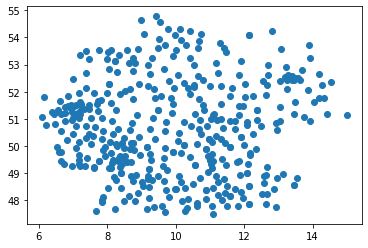

In [14]:
import matplotlib.pyplot as plt
#districts
cord = districts['coordinates']

x=[]
y=[]
for i in range(districts.shape[0]):
  x.append(cord[i][1])
  y.append(cord[i][0])

plt.scatter(x, y)
plt.show()

In [15]:
distances = []
for i in range(districts.shape[0]):
  distances.append([])
  for j in range(districts.shape[0]):
    distances[i].append(geopy.distance.geodesic(districts['coordinates'][i], districts['coordinates'][j]).km)

In [16]:
np.array(distances).shape

(411, 411)

In [17]:
n = 100  # district choosen to run tests on, like how the covid cases are changing or testing if the distances between districts have been calculated properly

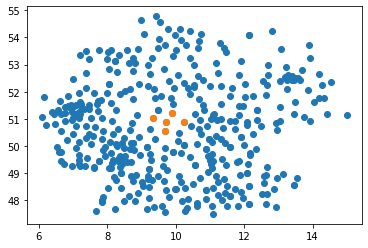

In [18]:
x1 = []
y1 = []

for i in range(districts.shape[0]):
  if (distances[n][i]<d):
    x1.append(cord[i][1])
    y1.append(cord[i][0])
plt.scatter(x, y)
plt.scatter(x1, y1)
plt.show()

In [19]:
edge_index = []
edge_weight = []
for i in range(districts.shape[0]):
  for j in range(districts.shape[0]):
    if (distances[i][j]<d) and distances :
      edge_index.append([i,j])
      edge_weight.append([d-distances[i][j]])
edge_index = np.array(edge_index).T
edge_weight = np.array(edge_weight)

In [20]:
print(edge_index, '\n', edge_weight)

[[  0   0   0 ... 410 410 410]
 [  0  40  66 ...  66  97 410]] 
 [[40.        ]
 [ 5.95066021]
 [11.16245636]
 ...
 [ 1.48356513]
 [ 5.3192033 ]
 [40.        ]]


In [21]:
features = data1['AnzahlFall'].unstack(level=0)
features = np.array(features.fillna(0))
features = np.reshape(features, (features.shape[0],features.shape[1],1))
print(features.shape, '\n', features)

(849, 411, 1) 
 [[[0.00e+00]
  [0.00e+00]
  [0.00e+00]
  ...
  [0.00e+00]
  [0.00e+00]
  [0.00e+00]]

 [[0.00e+00]
  [0.00e+00]
  [0.00e+00]
  ...
  [0.00e+00]
  [0.00e+00]
  [0.00e+00]]

 [[0.00e+00]
  [0.00e+00]
  [0.00e+00]
  ...
  [0.00e+00]
  [0.00e+00]
  [1.00e+00]]

 ...

 [[1.37e+02]
  [2.01e+02]
  [3.32e+02]
  ...
  [1.98e+02]
  [7.80e+01]
  [1.27e+03]]

 [[1.43e+02]
  [1.45e+02]
  [1.69e+02]
  ...
  [2.13e+02]
  [7.50e+01]
  [8.77e+02]]

 [[1.12e+02]
  [2.08e+02]
  [1.76e+02]
  ...
  [1.87e+02]
  [3.40e+01]
  [5.27e+02]]]


In [22]:
nday = 7
features_nday = []
targets = []

for i in range(features.shape[0]-nday+1):
  features_nday.append(np.mean(features[i:i+nday], axis=0))
for i in range(features.shape[0]-nday):
  targets.append(features_nday[i+1])
  
x_data = np.array(range(len(features_nday)-1))

features_nday = np.array(features_nday[:-1])
targets = np.array(targets)
print(features_nday.shape, targets.shape, x_data.shape)

(842, 411, 1) (842, 411, 1) (842,)


In [23]:
def trend(x, a, b, c):
  return a + np.exp(b*x+c)

In [24]:
features_nday[0].T.shape

(1, 411)

In [25]:
from scipy.optimize import curve_fit
params = []
for i in range(districts.shape[0]):
  popt, pcov = curve_fit(trend, x_data, features_nday[:,i,0], bounds=([-10,-10,-10],[10,10,10]))
  params.append(popt)
params[100]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


array([ 4.80836534,  0.01057513, -3.3046447 ])

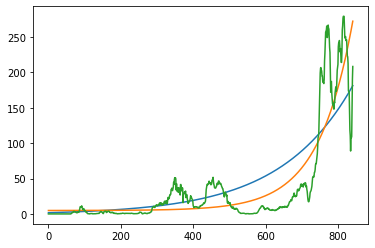

In [26]:
y_plot = features_nday[:,n,0]
plt.plot(np.exp(0.005*np.array(range(len(y_plot)))+1)-1)
plt.plot(np.exp(params[n][1]*np.array(range(len(y_plot)))+params[n][2])+params[n][0])
plt.plot(y_plot)
plt.show()

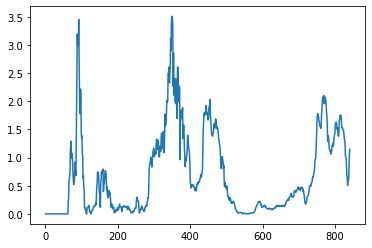

In [27]:
#plt.plot(y_plot/trend(np.array(range(len(y_plot))),params[n][0],params[n][1],params[n][2]))
plt.plot(y_plot/trend(np.array(range(len(y_plot))),-1,0.005,1))
plt.show()

In [28]:
!pip install torch 
!pip install torch_geometric_temporal

     |████████████████████████████████| 48 kB 4.5 MB/s 
     |████████████████████████████████| 48 kB 5.4 MB/s 
     |████████████████████████████████| 407 kB 44.4 MB/s 
  Created wheel for torch-geometric-temporal: filename=torch_geometric_temporal-0.52.0-py3-none-any.whl size=86194 sha256=9efb3fadb147d1bed6224a576cd25e6f0195fc654b360c9a8ad098e9b1ac5278
  Stored in directory: /root/.cache/pip/wheels/eb/f1/e5/dd02c6d1e5f00f907f5e4894c60c5a21b774db1ed7464d0c23
  Created wheel for torch-geometric: filename=torch_geometric-2.0.4-py3-none-any.whl size=616603 sha256=1c266159f33031f49ff6761591965ca59f3e331a6b2915ff23ab6464e687921c
  Stored in directory: /root/.cache/pip/wheels/18/a6/a4/ca18c3051fcead866fe7b85700ee2240d883562a1bc70ce421
  Created wheel for torch-scatter: filename=torch_scatter-2.0.9-cp37-cp37m-linux_x86_64.whl size=279639 sha256=2e1157c5db7c8b83a728db1e23a5ea7f3a5c757a836cc2391ef347a8ebd57dd6
  Stored in directory: /root/.cache/pip/wheels/dd/57/a3/42ea193b77378ce634eb9454c9bc

In [29]:
import torch
import torch.nn.functional as F
from torch_geometric_temporal.nn.recurrent import GConvGRU
from torch_geometric_temporal.signal.static_graph_temporal_signal import StaticGraphTemporalSignal
from torch_geometric_temporal.signal import temporal_signal_split

class RecurrentGCN(torch.nn.Module):
    def __init__(self, node_features, hidden_states):
        super(RecurrentGCN, self).__init__()
        self.recurrent1 = GConvGRU(node_features, hidden_states, 2)
        #self.recurrent2 = GConvGRU(hidden_states, 32, 2)
        self.linear = torch.nn.Linear(32, 1)

    def forward(self, x, edge_index, edge_weight):
        h = self.recurrent1(x, edge_index, edge_weight)
        h = F.relu(h)
        #h = self.recurrent2(h, edge_index, edge_weight)
        #h = F.relu(h)
        h = self.linear(h)
        return h

In [30]:
dataset = StaticGraphTemporalSignal(edge_index= edge_index,
        edge_weight= edge_weight,
        features= features_nday, targets= targets)
train_dataset, test_dataset = temporal_signal_split(dataset , train_ratio=0.92)

In [31]:
train_dataset.features.shape

(774, 411, 1)

In [32]:
from tqdm import tqdm

model = RecurrentGCN(node_features=1, hidden_states=32)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

model.train()
c = []
for epoch in tqdm(range(200)):
    for time, snapshot in enumerate(train_dataset):
        y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
        print(y_hat.shape, '\n', y_hat)
        cost = torch.mean((y_hat-snapshot.y)**2)
        print(cost.shape, '\n', cost)
        c.append(cost.detach().numpy())
        cost.backward()
        optimizer.step()
        optimizer.zero_grad()
        break

  4%|▎         | 7/200 [00:00<00:05, 34.90it/s]

torch.Size([411, 1]) 
 tensor([[-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0135],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0135],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0134],
        [-0.0136],
        [-0.0502],
        [-0.0136],
        [-0.0136],
        [-0.0187],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0135],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0135],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        [-0.0136],
        

  8%|▊         | 16/200 [00:00<00:04, 40.49it/s]

torch.Size([411, 1]) 
 tensor([[0.0340],
        [0.0340],
        [0.0340],
        [0.0324],
        [0.0325],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0333],
        [0.0329],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0336],
        [0.0340],
        [0.0335],
        [0.0340],
        [0.0340],
        [0.0326],
        [0.0323],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0369],
        [0.0340],
        [0.2121],
        [0.0340],
        [0.0340],
        [0.0646],
        [0.0340],
        [0.0340],
        [0.0331],
        [0.0340],
        [0.0325],
        [0.0336],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0328],
        [0.0325],
        [0.0340],
        [0.0324],
        [0.0340],
        [0.0337],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0340],
        [0.0332],
        [0.0324],
     

 13%|█▎        | 26/200 [00:00<00:04, 41.50it/s]

torch.Size([411, 1]) 
 tensor([[0.0279],
        [0.0279],
        [0.0279],
        [0.0390],
        [0.0347],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0301],
        [0.0312],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0290],
        [0.0279],
        [0.0295],
        [0.0279],
        [0.0279],
        [0.0336],
        [0.0481],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0605],
        [0.0279],
        [0.4556],
        [0.0279],
        [0.0279],
        [0.1020],
        [0.0279],
        [0.0279],
        [0.0309],
        [0.0279],
        [0.0350],
        [0.0545],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0317],
        [0.0349],
        [0.0279],
        [0.0398],
        [0.0279],
        [0.0287],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0279],
        [0.0303],
        [0.0378],
     

 16%|█▌        | 31/200 [00:00<00:04, 39.51it/s]

tensor(0.0018, grad_fn=<MeanBackward0>)
torch.Size([411, 1]) 
 tensor([[7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [9.7250e-03],
        [4.4016e-03],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [1.4408e-03],
        [1.9033e-03],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [1.0153e-03],
        [7.8340e-04],
        [1.1900e-03],
        [7.8885e-04],
        [7.8340e-04],
        [3.1679e-03],
        [2.1707e-02],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [3.8683e-02],
        [7.8340e-04],
        [7.4005e-01],
        [7.8340e-04],
        [7.8340e-04],
        [1.1447e-01],
        [7.8340e-04],
        [7.8340e-04],
        [1.7528e-03],
        [7.8340e-04],
        [4.7669e-03],
        [2.9891e-02],
        [7.8340e-04],
        [7.8340e-04],
        [7.8340e-04],
        [2.0933e-03],
        [4.6519e-03],
        [7.83

 20%|█▉        | 39/200 [00:01<00:04, 32.68it/s]

torch.Size([411, 1]) 
 tensor([[-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-6.4244e-03],
        [-6.1769e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.8906e-03],
        [-5.9593e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.8209e-03],
        [-5.7533e-03],
        [-5.8534e-03],
        [-5.7549e-03],
        [-5.7533e-03],
        [-6.1066e-03],
        [-6.6639e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-1.4517e-03],
        [-5.7533e-03],
        [ 8.3391e-01],
        [-5.7533e-03],
        [-5.7533e-03],
        [ 9.2997e-02],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.9369e-03],
        [-5.7533e-03],
        [-6.1977e-03],
        [-4.3934e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.7533e-03],
        [-5.9876e-03],
        [-6.1911e-03],
        [-5

 24%|██▍       | 48/200 [00:01<00:04, 35.40it/s]

torch.Size([411, 1]) 
 tensor([[0.0084],
        [0.0084],
        [0.0084],
        [0.0066],
        [0.0073],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0081],
        [0.0079],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0083],
        [0.0084],
        [0.0082],
        [0.0084],
        [0.0084],
        [0.0075],
        [0.0040],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0018],
        [0.0084],
        [0.8257],
        [0.0084],
        [0.0084],
        [0.0881],
        [0.0084],
        [0.0084],
        [0.0079],
        [0.0084],
        [0.0072],
        [0.0020],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0078],
        [0.0073],
        [0.0084],
        [0.0065],
        [0.0084],
        [0.0083],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0084],
        [0.0080],
        [0.0068],
     

 28%|██▊       | 57/200 [00:01<00:03, 38.93it/s]

tensor([[0.0062],
        [0.0062],
        [0.0062],
        [0.0028],
        [0.0037],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0054],
        [0.0050],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0058],
        [0.0062],
        [0.0056],
        [0.0062],
        [0.0062],
        [0.0041],
        [0.0053],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0084],
        [0.0062],
        [0.8147],
        [0.0062],
        [0.0062],
        [0.1085],
        [0.0062],
        [0.0062],
        [0.0051],
        [0.0062],
        [0.0036],
        [0.0069],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0048],
        [0.0036],
        [0.0062],
        [0.0030],
        [0.0062],
        [0.0059],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0062],
        [0.0053],
        [0.0026],
        [0.0027],
        [0

 30%|███       | 61/200 [00:01<00:03, 38.51it/s]

torch.Size([411, 1]) 
 tensor([[0.0023],
        [0.0023],
        [0.0023],
        [0.0040],
        [0.0034],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0026],
        [0.0028],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0024],
        [0.0023],
        [0.0025],
        [0.0023],
        [0.0023],
        [0.0032],
        [0.0053],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0081],
        [0.0023],
        [0.7861],
        [0.0023],
        [0.0023],
        [0.1115],
        [0.0023],
        [0.0023],
        [0.0027],
        [0.0023],
        [0.0034],
        [0.0063],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0029],
        [0.0034],
        [0.0023],
        [0.0041],
        [0.0023],
        [0.0024],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0023],
        [0.0026],
        [0.0039],
     

 35%|███▌      | 70/200 [00:01<00:03, 37.73it/s]

tensor([[0.0011],
        [0.0011],
        [0.0011],
        [0.0036],
        [0.0025],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0013],
        [0.0015],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0012],
        [0.0011],
        [0.0013],
        [0.0011],
        [0.0011],
        [0.0022],
        [0.0058],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0106],
        [0.0011],
        [0.7819],
        [0.0011],
        [0.0011],
        [0.1143],
        [0.0011],
        [0.0011],
        [0.0014],
        [0.0011],
        [0.0026],
        [0.0080],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0016],
        [0.0026],
        [0.0011],
        [0.0038],
        [0.0011],
        [0.0012],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0011],
        [0.0013],
        [0.0033],
        [0.0033],
        [0

 40%|████      | 80/200 [00:02<00:02, 40.37it/s]

torch.Size([411, 1]) 
 tensor([[-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 3.6986e-03],
        [ 1.2423e-03],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 3.2915e-05],
        [ 2.5340e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [-1.9030e-04],
        [-4.0634e-04],
        [-8.6144e-05],
        [-4.0128e-04],
        [-4.0634e-04],
        [ 7.2704e-04],
        [ 8.8730e-03],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 1.5352e-02],
        [-4.0634e-04],
        [ 7.8203e-01],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 1.1776e-01],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 1.8153e-04],
        [-4.0634e-04],
        [ 1.4098e-03],
        [ 1.2262e-02],
        [-4.0634e-04],
        [-4.0634e-04],
        [-4.0634e-04],
        [ 3.4432e-04],
        [ 1.3571e-03],
        [-4

 44%|████▍     | 89/200 [00:02<00:02, 39.04it/s]

tensor(0.0015, grad_fn=<MeanBackward0>)
torch.Size([411, 1]) 
 tensor([[-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [ 4.8111e-03],
        [ 2.2915e-03],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [-7.4236e-05],
        [ 4.9695e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [-5.8831e-04],
        [-8.4469e-04],
        [-3.8387e-04],
        [-8.3983e-04],
        [-8.4469e-04],
        [ 1.7145e-03],
        [ 1.0121e-02],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [ 1.6766e-02],
        [-8.4469e-04],
        [ 7.7154e-01],
        [-8.4469e-04],
        [-8.4469e-04],
        [ 1.1723e-01],
        [-8.4469e-04],
        [-8.4469e-04],
        [ 3.1108e-04],
        [-8.4469e-04],
        [ 2.4623e-03],
        [ 1.3597e-02],
        [-8.4469e-04],
        [-8.4469e-04],
        [-8.4469e-04],
        [ 7.3165e

 49%|████▉     | 98/200 [00:02<00:02, 39.42it/s]

tensor([[-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [ 3.8281e-03],
        [ 1.1938e-03],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [-2.0243e-04],
        [-1.2860e-05],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [-3.9420e-04],
        [-5.7963e-04],
        [-3.0473e-04],
        [-5.7529e-04],
        [-5.7963e-04],
        [ 6.2690e-04],
        [ 9.1263e-03],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [ 1.5757e-02],
        [-5.7963e-04],
        [ 7.6916e-01],
        [-5.7963e-04],
        [-5.7963e-04],
        [ 1.1783e-01],
        [-5.7963e-04],
        [-5.7963e-04],
        [-7.4666e-05],
        [-5.7963e-04],
        [ 1.3616e-03],
        [ 1.2595e-02],
        [-5.7963e-04],
        [-5.7963e-04],
        [-5.7963e-04],
        [ 6.5355e-05],
        [ 1.3088e-03],
        [-5.7963e-04],
        [ 4

 51%|█████     | 102/200 [00:02<00:02, 38.91it/s]

torch.Size([411, 1]) 
 tensor([[-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [ 4.0723e-03],
        [ 1.1440e-03],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [-3.3204e-05],
        [ 1.6252e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [-2.3125e-04],
        [-4.2279e-04],
        [-1.3885e-04],
        [-4.1831e-04],
        [-4.2279e-04],
        [ 6.7869e-04],
        [ 9.5664e-03],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [ 1.6444e-02],
        [-4.2279e-04],
        [ 7.7473e-01],
        [-4.2279e-04],
        [-4.2279e-04],
        [ 1.1829e-01],
        [-4.2279e-04],
        [-4.2279e-04],
        [ 9.8709e-05],
        [-4.2279e-04],
        [ 1.3825e-03],
        [ 1.3164e-02],
        [-4.2279e-04],
        [-4.2279e-04],
        [-4.2279e-04],
        [ 2.4326e-04],
        [ 1.3040e-03],
        [-4

 56%|█████▌    | 111/200 [00:02<00:02, 38.06it/s]

torch.Size([]) 
 tensor(0.0015, grad_fn=<MeanBackward0>)
torch.Size([411, 1]) 
 tensor([[-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [ 5.4507e-03],
        [ 2.2180e-03],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [-8.7954e-06],
        [ 2.5105e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [-2.7210e-04],
        [-5.2717e-04],
        [-1.4920e-04],
        [-5.2119e-04],
        [-5.2717e-04],
        [ 1.2915e-03],
        [ 1.1496e-02],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],
        [ 1.9070e-02],
        [-5.2717e-04],
        [ 7.7331e-01],
        [-5.2717e-04],
        [-5.2717e-04],
        [ 1.1663e-01],
        [-5.2717e-04],
        [-5.2717e-04],
        [ 1.6638e-04],
        [-5.2717e-04],
        [ 2.4921e-03],
        [ 1.5458e-02],
        [-5.2717e-04],
        [-5.2717e-04],
        [-5.2717e-04],


 60%|██████    | 120/200 [00:03<00:02, 39.50it/s]

torch.Size([411, 1]) 
 tensor([[-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 5.3450e-03],
        [ 1.8165e-03],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 2.0603e-04],
        [ 5.4684e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [-1.3965e-04],
        [-4.7486e-04],
        [ 2.1741e-05],
        [-4.6700e-04],
        [-4.7486e-04],
        [ 1.2768e-03],
        [ 1.2001e-02],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 2.0346e-02],
        [-4.7486e-04],
        [ 7.7236e-01],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 1.1570e-01],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 4.3582e-04],
        [-4.7486e-04],
        [ 2.0897e-03],
        [ 1.6365e-02],
        [-4.7486e-04],
        [-4.7486e-04],
        [-4.7486e-04],
        [ 6.8718e-04],
        [ 1.9948e-03],
        [-4

 64%|██████▍   | 128/200 [00:03<00:01, 38.57it/s]


torch.Size([411, 1]) 
 tensor([[-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 5.5406e-03],
        [ 2.3061e-03],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 2.9149e-04],
        [ 7.7615e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [-2.0053e-04],
        [-6.7805e-04],
        [ 2.9232e-05],
        [-6.6684e-04],
        [-6.7805e-04],
        [ 1.8130e-03],
        [ 1.3283e-02],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 2.3001e-02],
        [-6.7805e-04],
        [ 7.7029e-01],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 1.1487e-01],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 6.1832e-04],
        [-6.7805e-04],
        [ 2.4522e-03],
        [ 1.8363e-02],
        [-6.7805e-04],
        [-6.7805e-04],
        [-6.7805e-04],
        [ 9.7563e-04],
        [ 2.4062e-03],
        [-

 66%|██████▌   | 132/200 [00:03<00:02, 32.51it/s]


torch.Size([]) 
 tensor(0.0014, grad_fn=<MeanBackward0>)
torch.Size([411, 1]) 
 tensor([[-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [ 5.9118e-03],
        [ 2.7798e-03],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [ 3.3328e-04],
        [ 9.2203e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [-2.6450e-04],
        [-8.4479e-04],
        [ 1.4665e-05],
        [-8.3117e-04],
        [-8.4479e-04],
        [ 2.1812e-03],
        [ 1.4578e-02],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],
        [ 2.5466e-02],
        [-8.4479e-04],
        [ 7.6762e-01],
        [-8.4479e-04],
        [-8.4479e-04],
        [ 1.1416e-01],
        [-8.4479e-04],
        [-8.4479e-04],
        [ 7.3032e-04],
        [-8.4479e-04],
        [ 2.9572e-03],
        [ 2.0269e-02],
        [-8.4479e-04],
        [-8.4479e-04],
        [-8.4479e-04],

 70%|███████   | 140/200 [00:03<00:01, 30.81it/s]

torch.Size([411, 1]) 
 tensor([[-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [ 5.3028e-03],
        [ 2.3524e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [-2.4848e-04],
        [ 3.7734e-04],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [-8.8387e-04],
        [-1.2234e-03],
        [-5.8714e-04],
        [-1.2176e-03],
        [-1.2234e-03],
        [ 1.7160e-03],
        [ 1.4418e-02],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [ 2.5876e-02],
        [-1.2234e-03],
        [ 7.6853e-01],
        [-1.2234e-03],
        [-1.2234e-03],
        [ 1.1322e-01],
        [-1.2234e-03],
        [-1.2234e-03],
        [ 1.7354e-04],
        [-1.2234e-03],
        [ 2.5410e-03],
        [ 2.0406e-02],
        [-1.2234e-03],
        [-1.2234e-03],
        [-1.2234e-03],
        [ 6.3489e-04],
        [ 2.4816e-03],
        [-1

 74%|███████▍  | 148/200 [00:04<00:01, 33.45it/s]

tensor([[-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 3.9377e-03],
        [ 1.5732e-03],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 3.1755e-04],
        [ 5.6421e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 6.8711e-05],
        [-1.7126e-04],
        [ 1.8472e-04],
        [-1.6564e-04],
        [-1.7126e-04],
        [ 1.0968e-03],
        [ 1.3591e-02],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 2.5863e-02],
        [-1.7126e-04],
        [ 7.6955e-01],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 1.1183e-01],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 4.8372e-04],
        [-1.7126e-04],
        [ 1.7702e-03],
        [ 2.0003e-02],
        [-1.7126e-04],
        [-1.7126e-04],
        [-1.7126e-04],
        [ 6.6616e-04],
        [ 1.7082e-03],
        [-1.7126e-04],
        [ 4

 78%|███████▊  | 156/200 [00:04<00:01, 35.13it/s]

torch.Size([411, 1]) 
 tensor([[-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 4.9754e-03],
        [ 1.3669e-03],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 2.5213e-04],
        [ 5.1762e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [-1.5555e-05],
        [-2.7351e-04],
        [ 1.0921e-04],
        [-2.6748e-04],
        [-2.7351e-04],
        [ 1.0914e-03],
        [ 1.5812e-02],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 2.9447e-02],
        [-2.7351e-04],
        [ 7.7238e-01],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 1.1135e-01],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 4.3097e-04],
        [-2.7351e-04],
        [ 1.4488e-03],
        [ 2.2936e-02],
        [-2.7351e-04],
        [-2.7351e-04],
        [-2.7351e-04],
        [ 6.2741e-04],
        [ 1.4230e-03],
        [-2

 82%|████████▏ | 164/200 [00:04<00:01, 35.94it/s]

torch.Size([411, 1]) 
 tensor([[-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [ 3.5960e-03],
        [ 1.0512e-03],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [-2.9547e-05],
        [ 2.2718e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [-2.8793e-04],
        [-5.3645e-04],
        [-1.6755e-04],
        [-5.3065e-04],
        [-5.3645e-04],
        [ 7.8349e-04],
        [ 1.5299e-02],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [ 3.0034e-02],
        [-5.3645e-04],
        [ 7.7051e-01],
        [-5.3645e-04],
        [-5.3645e-04],
        [ 1.1005e-01],
        [-5.3645e-04],
        [-5.3645e-04],
        [ 1.4334e-04],
        [-5.3645e-04],
        [ 1.1310e-03],
        [ 2.2996e-02],
        [-5.3645e-04],
        [-5.3645e-04],
        [-5.3645e-04],
        [ 3.3347e-04],
        [ 1.1059e-03],
        [-5

 86%|████████▋ | 173/200 [00:04<00:00, 37.69it/s]

torch.Size([411, 1]) 
 tensor([[-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 3.5314e-03],
        [ 1.2260e-03],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 3.0902e-04],
        [ 5.2565e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 9.1825e-05],
        [-1.1627e-04],
        [ 1.9291e-04],
        [-1.1142e-04],
        [-1.1627e-04],
        [ 9.9763e-04],
        [ 1.5175e-02],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 3.0710e-02],
        [-1.1627e-04],
        [ 7.7191e-01],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 1.1114e-01],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 4.5482e-04],
        [-1.1627e-04],
        [ 1.2941e-03],
        [ 2.3289e-02],
        [-1.1627e-04],
        [-1.1627e-04],
        [-1.1627e-04],
        [ 6.1556e-04],
        [ 1.2726e-03],
        [-1

 88%|████████▊ | 177/200 [00:04<00:00, 35.30it/s]

torch.Size([411, 1]) 
 tensor([[ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.6062e-03],
        [ 1.0437e-03],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.4834e-04],
        [ 5.1097e-04],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 1.8644e-04],
        [ 3.2481e-05],
        [ 2.6164e-04],
        [ 3.6057e-05],
        [ 3.2481e-05],
        [ 8.6893e-04],
        [ 1.4852e-02],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.0990e-02],
        [ 3.2481e-05],
        [ 7.7133e-01],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 1.1107e-01],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 4.5767e-04],
        [ 3.2481e-05],
        [ 1.1086e-03],
        [ 2.3281e-02],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 3.2481e-05],
        [ 5.7879e-04],
        [ 1.0796e-03],
        [ 3

 92%|█████████▎| 185/200 [00:05<00:00, 36.70it/s]

tensor([[-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [ 3.7698e-03],
        [ 8.2812e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-2.6667e-04],
        [-9.3110e-05],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-4.3940e-04],
        [-6.0358e-04],
        [-3.5919e-04],
        [-5.9977e-04],
        [-6.0358e-04],
        [ 2.8915e-04],
        [ 1.6044e-02],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [ 3.3188e-02],
        [-6.0358e-04],
        [ 7.7236e-01],
        [-6.0358e-04],
        [-6.0358e-04],
        [ 1.1126e-01],
        [-6.0358e-04],
        [-6.0358e-04],
        [-1.5000e-04],
        [-6.0358e-04],
        [ 1.0758e-03],
        [ 2.4997e-02],
        [-6.0358e-04],
        [-6.0358e-04],
        [-6.0358e-04],
        [-2.0713e-05],
        [ 9.9782e-04],
        [-6.0358e-04],
        [ 4

 96%|█████████▋| 193/200 [00:05<00:00, 35.91it/s]

tensor(0.0014, grad_fn=<MeanBackward0>)
torch.Size([411, 1]) 
 tensor([[-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 3.3288e-03],
        [ 7.2170e-04],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 1.6796e-04],
        [ 2.9540e-04],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 4.2528e-05],
        [-7.5288e-05],
        [ 1.0060e-04],
        [-7.2572e-05],
        [-7.5288e-05],
        [ 5.8047e-04],
        [ 1.5009e-02],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 3.2803e-02],
        [-7.5288e-05],
        [ 7.7172e-01],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 1.1098e-01],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 2.5348e-04],
        [-7.5288e-05],
        [ 7.6426e-04],
        [ 2.4301e-02],
        [-7.5288e-05],
        [-7.5288e-05],
        [-7.5288e-05],
        [ 3.4895e

100%|██████████| 200/200 [00:05<00:00, 36.21it/s]

torch.Size([411, 1]) 
 tensor([[-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [ 3.6393e-03],
        [ 5.4871e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-2.6289e-04],
        [-1.2293e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-4.0079e-04],
        [-5.3046e-04],
        [-3.3692e-04],
        [-5.2746e-04],
        [-5.3046e-04],
        [ 1.8970e-04],
        [ 1.6511e-02],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [ 3.5189e-02],
        [-5.3046e-04],
        [ 7.7224e-01],
        [-5.3046e-04],
        [-5.3046e-04],
        [ 1.1112e-01],
        [-5.3046e-04],
        [-5.3046e-04],
        [-1.6895e-04],
        [-5.3046e-04],
        [ 8.0875e-04],
        [ 2.6264e-02],
        [-5.3046e-04],
        [-5.3046e-04],
        [-5.3046e-04],
        [-6.4164e-05],
        [ 7.2686e-04],
        [-5

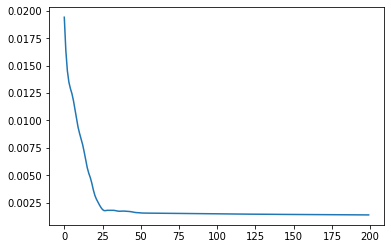

In [39]:
plt.plot(c)

In [42]:
print(cost)
print(c[199])

285184.25
0.0013718695


In [34]:
model.eval()
cost = 0
for time, snapshot in enumerate(test_dataset):
    y_hat = model(snapshot.x, snapshot.edge_index, snapshot.edge_attr)
    cost = cost + torch.mean((y_hat-snapshot.y)**2)
cost = cost / (time+1)
cost = cost.item()
print("MSE: {:.4f}".format(cost))


MSE: 285184.2500
